In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')
sns.set_palette("deep")

/var/folders/t7/pt4bzyfd5z544k7vbm9n9k8c0000gn/T/ipykernel_47312/744539261.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [21]:
# We combine training and testing datasets to ensure a balanced representation
# This will helps avoid potential biases from uneven churn distribution in the original split
df = pd.concat(
    [
        pd.read_csv('data/customer_churn_dataset-training-master.csv'), 
        pd.read_csv('data/customer_churn_dataset-testing-master.csv')
    ], 
    axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [33]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000



### Dataset description
---------

- **CustomerID** : Unique identifier for each customer.
- **Age** : Customer's age.
- **Gender** : Customer gender (e.g. Male, Female).
- **Tenure** : Length of time the customer has been using the service (in months).
- **Usage Frequency** : How often the customer uses the service.
- **Support Calls** : Number of support calls made by the customer.
- **Payment Delay** : Number of days that the customer has delayed their payment in the last month
- **Subscription Type** : Subscription type (e.g. Basic, Standard).
- **Contract Length** : Contract duration (e.g. Monthly, Quarterly, Annual).
- **Total Spend** : Total amount spent by the customer.
- **Last Interaction** : Time elapsed since last customer interaction (in days).
- **Churn** : Churn indicator (1.0 for customers who churned, 0.0 for those who stayed).

This database contains information on the customers of a subscription service, including demographic, usage and behavioral data. 

The main objective is to **predict and understand customer churn**, i.e. service abandonment. Key variables includeage, frequency of use, support calls and total spend. 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


### Exploratory Data Analysis

**The goal of EDA is to better understand the distributions of features, identify trends or patterns, and explore relationships between features and the target variable**


In [23]:
df['Age'].describe()

count    505206.000000
mean         39.704172
std          12.670577
min          18.000000
25%          29.000000
50%          40.000000
75%          49.000000
max          65.000000
Name: Age, dtype: float64

/Users/idrislakehal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


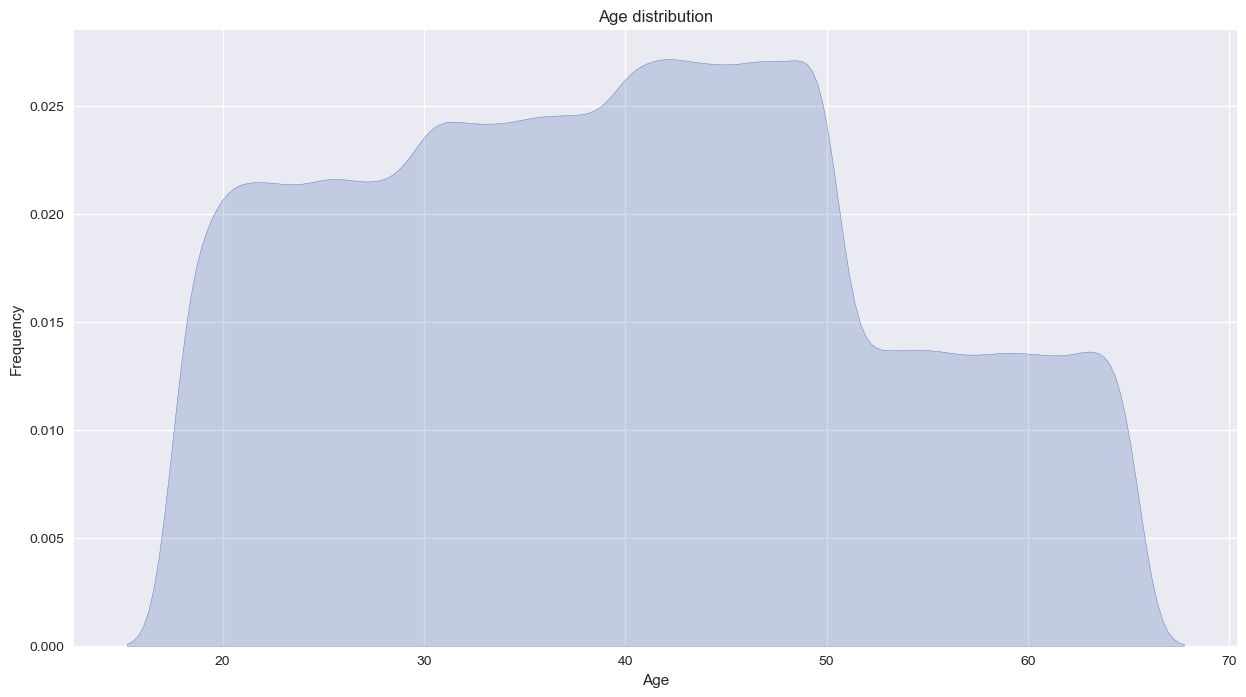

In [24]:
plt.figure(figsize=(15, 8))
sns.kdeplot(df['Age'], fill=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Most customers are **between 30 and 50 years old**, with peaks around 35-40 and 45-50. There are few very young (under 25) or older (over 55) customers. This can guide marketing strategies based on customer age.

The churn rate remains constant regardless of age, while the total number of customers increases with age, peaking around age 50.

In [34]:
df['Tenure'].describe()

count    505206.000000
mean         31.350435
std          17.237482
min           1.000000
25%          16.000000
50%          32.000000
75%          46.000000
max          60.000000
Name: Tenure, dtype: float64

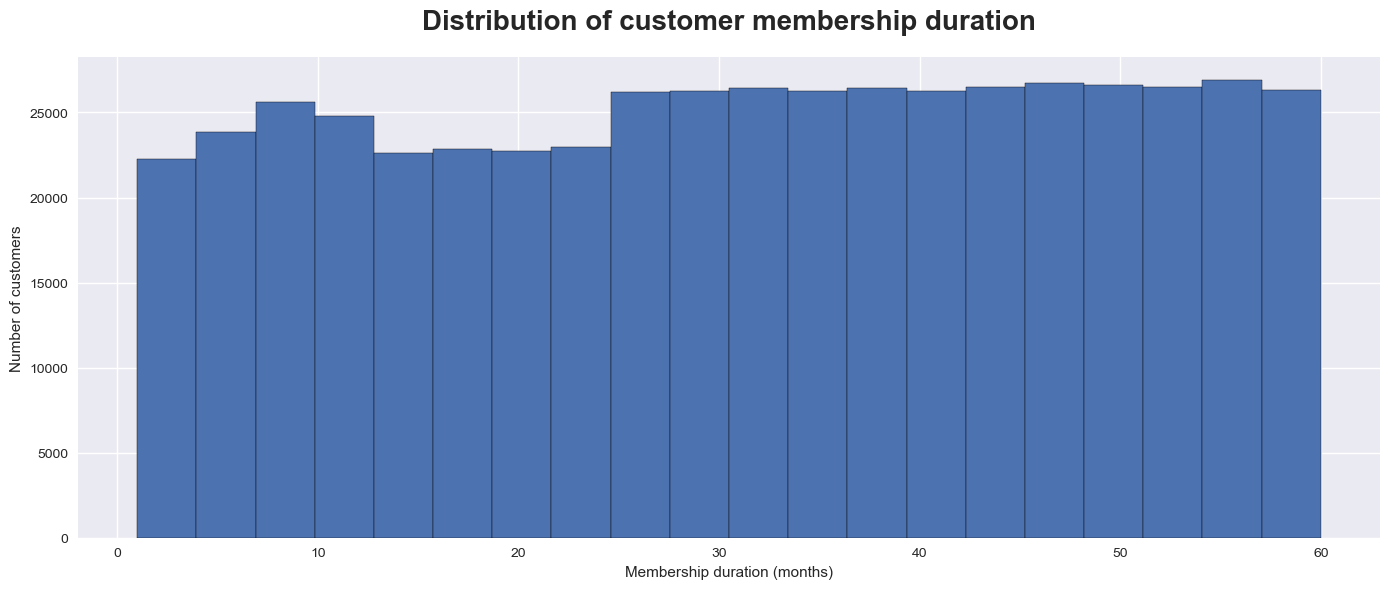

In [26]:
plt.figure(figsize=(14,6))

plt.hist(df['Tenure'], bins=20, edgecolor='black')
plt.title("Distribution of customer membership duration", fontweight="bold", size=20, pad=20)
plt.xlabel("Membership duration (months)")
plt.ylabel("Number of customers")

plt.tight_layout()
plt.show()

Customer length of membership is stable overall, with a slight increase for long-term customers, indicating good retention.
We can assume that loyalty in the first few months could be improved.

In [27]:
df['Usage Frequency'].describe()


count    505206.000000
mean         15.714825
std           8.619323
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          30.000000
Name: Usage Frequency, dtype: float64

/Users/idrislakehal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


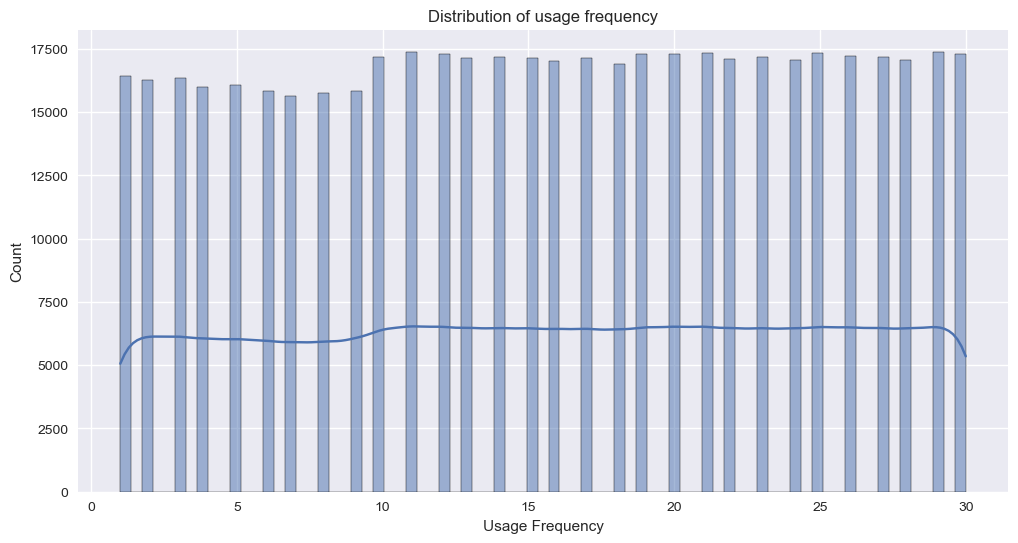

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Usage Frequency'], kde=True)
plt.title("Distribution of usage frequency")
plt.xlabel("Usage Frequency")
plt.show()


Frequency of use is evenly distributed, with no obvious peak, with a slight increase for **very active users (25-30 uses)**. 
This suggests opportunities to encourage more frequent use among low-use customers.

In [29]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64

In [30]:
df['Contract Length'].value_counts()

Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64

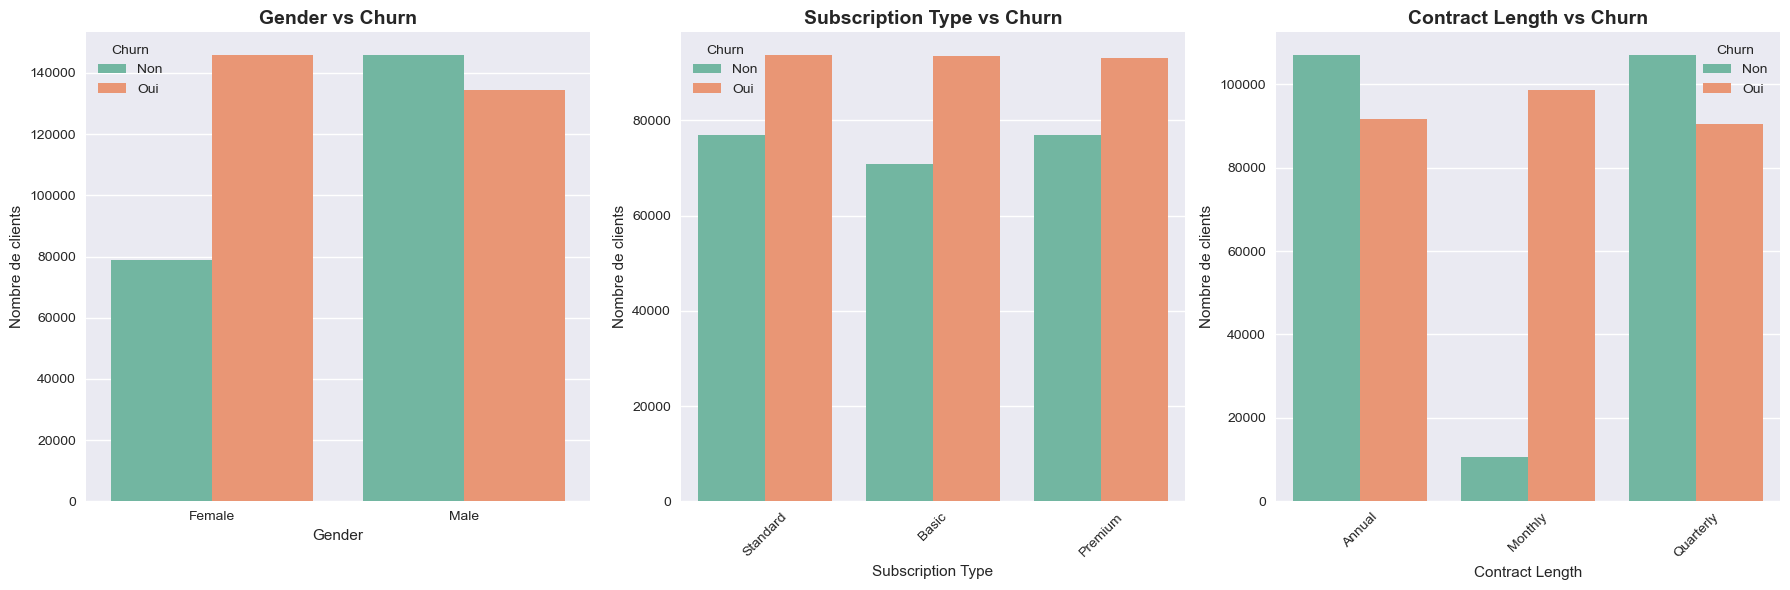

In [31]:
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']

plt.figure(figsize=(18, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, hue='Churn', data=df, palette="Set2")
    plt.title(f'{feature} vs Churn', fontweight="bold", size=14)
    plt.xlabel(feature)
    plt.ylabel('Number of clients')
    plt.legend(title="Churn", labels=["No", "Yes"])
    plt.xticks(rotation=45 if feature != 'Gender' else 0)

plt.tight_layout()
plt.show()

What we can interpret from all these graphs is that **Males have a slightly lower churn rate** than females.

For the Subscription plan, we can see that Basic subscribers churn the most, while Premium subscribers churn the least. 

Also, **Monthly contracts show the highest churn**, and annual contracts the lowest. 

An important notion is that "Contract length" has the biggest impact on churn, with **longer contracts and higher-tier subscriptions** linked to better retention.

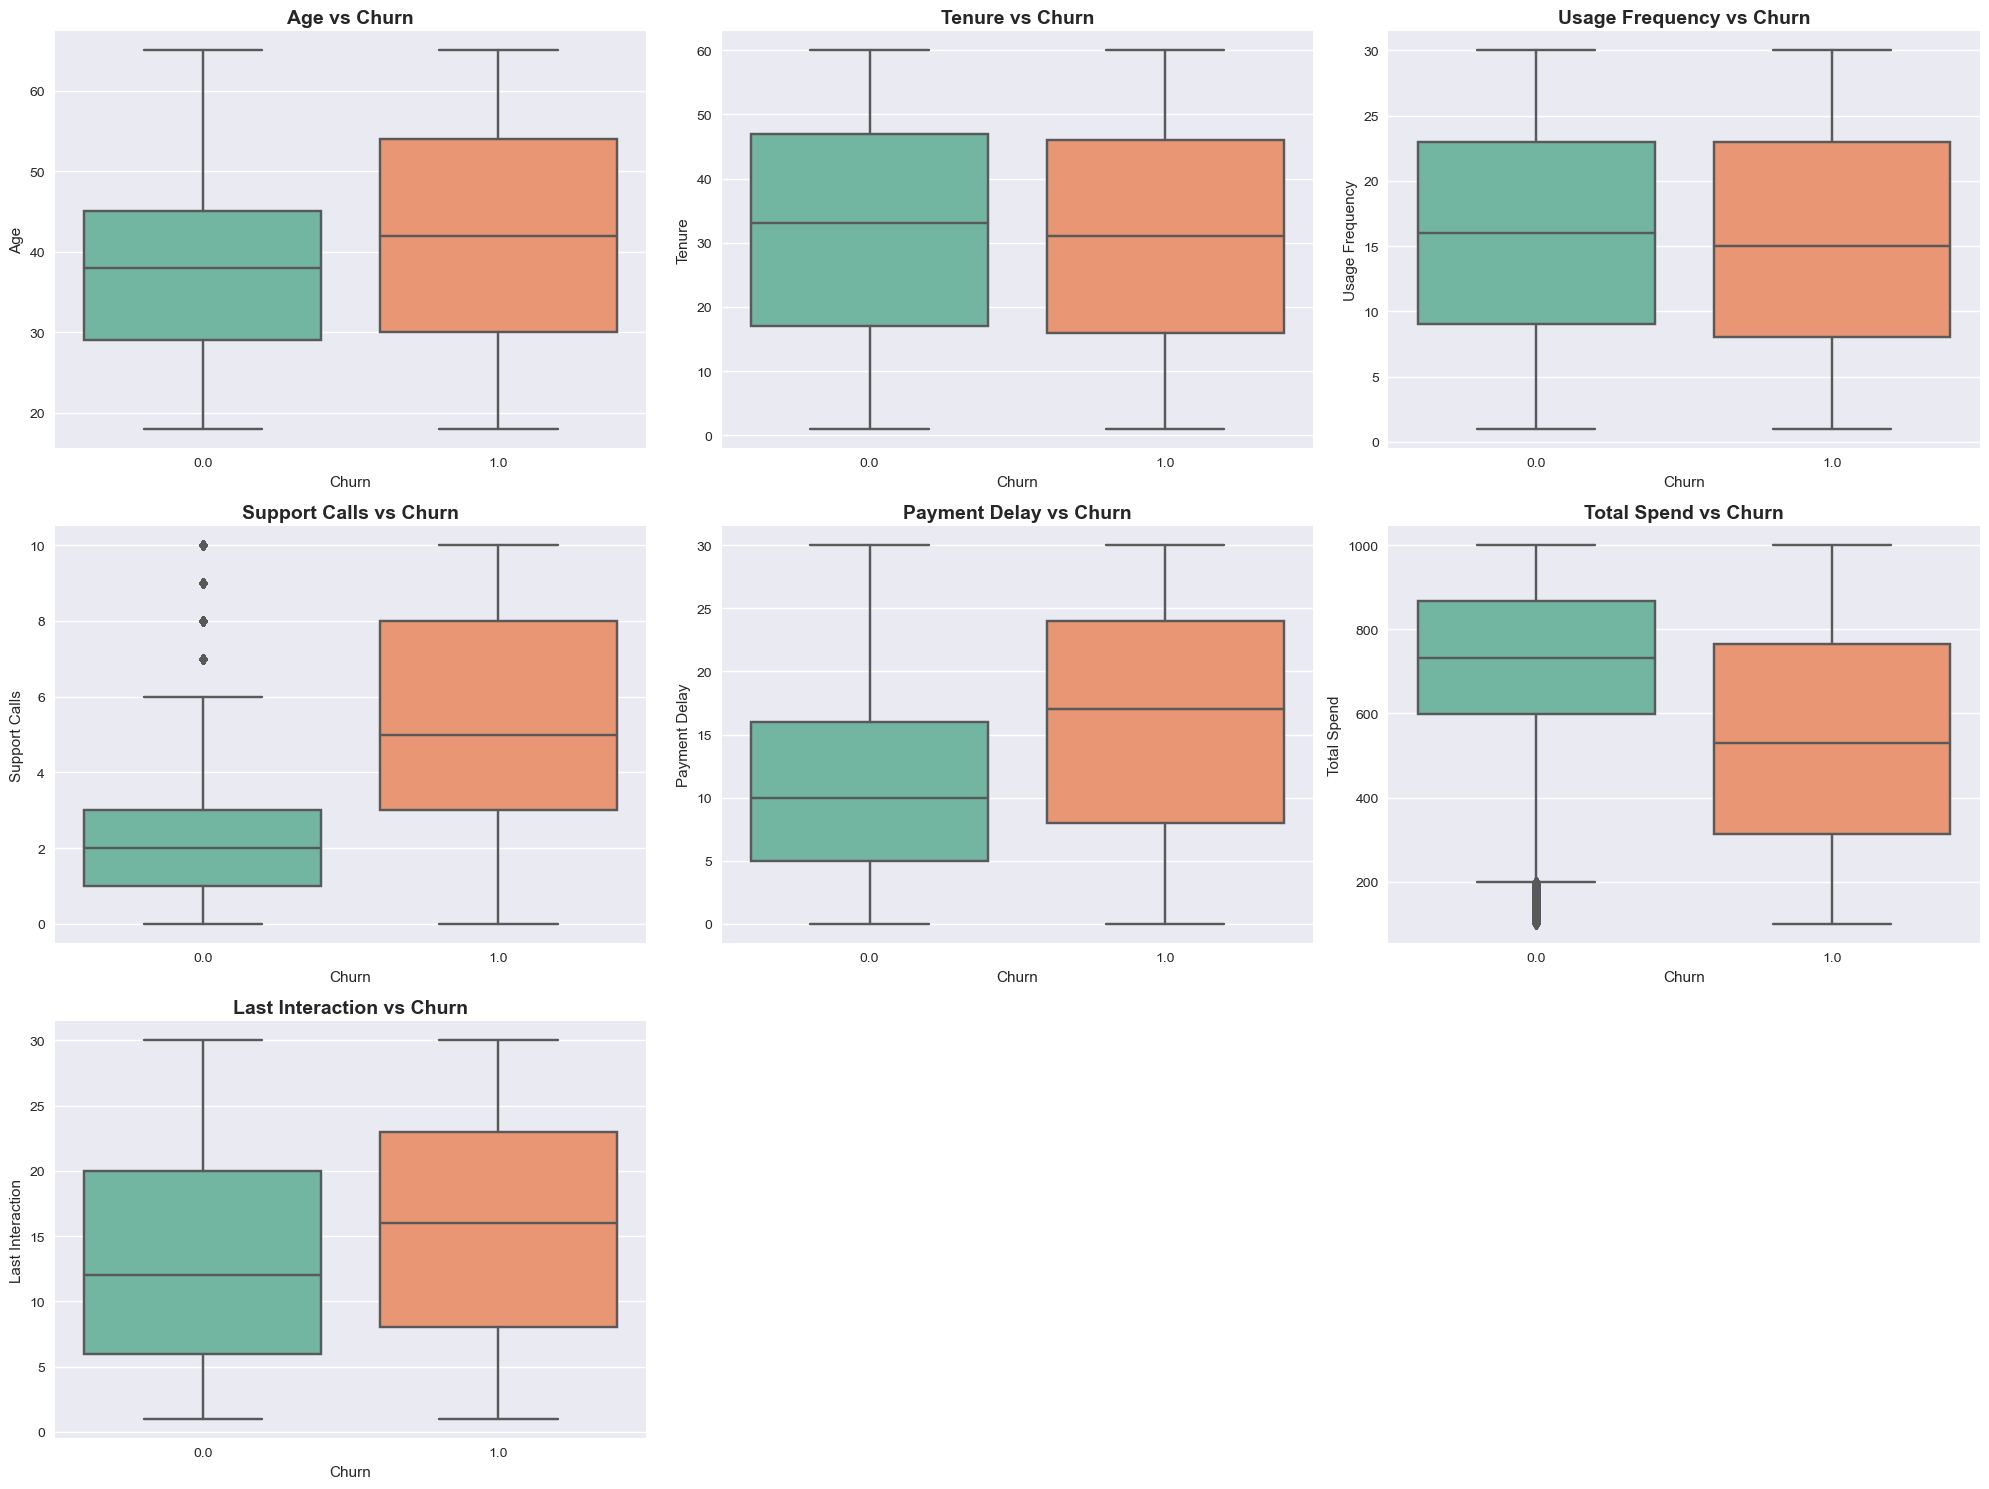

In [32]:
numeric_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df, palette="Set2")
    plt.title(f'{feature} vs Churn', fontweight="bold", size=14)
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In this one, the box plot show that churned customers **tend to be older**, **have shorter tenure**, **lower usage frequency**, more **support calls**, slightly **higher payment delays**, lower **total spend**, and **longer time since their last interaction**. 

The biggest differences are in support calls, total spend, and last interaction, suggesting that more engaged customers with fewer issues are **less likely to churn**.

### Multivariate Analysis
----------

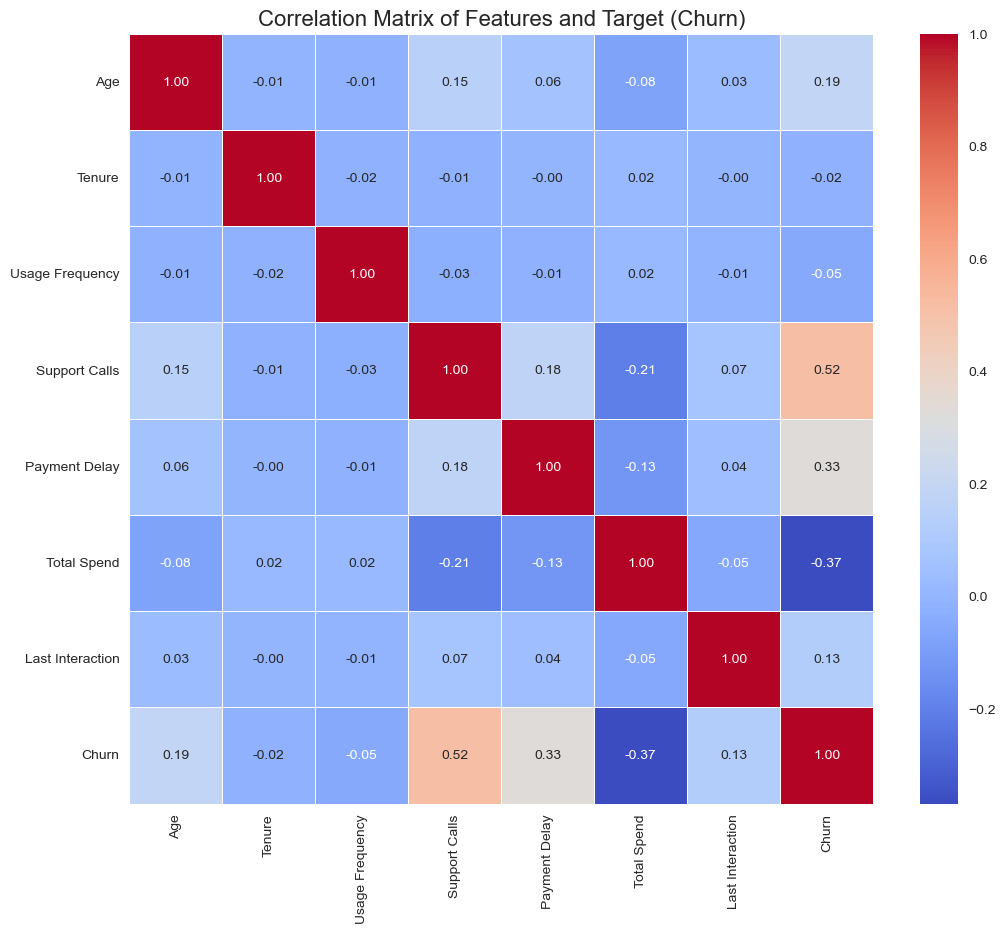

In [35]:
# Include target variable 'Churn' and numerical characteristics for correlation analysis
numerical_features_with_target = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features_with_target].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Target (Churn)', fontsize=16)
plt.show()

The correlation matrix results show that **customers who call support frequently are more likely to leave**, while those **who spend more tend to stay**.